# PROYECTO ALTERNATIVO: MODELO DE RIESGO DE IMPAGO (Financiera Horizonte S.A.)

link de github: https://github.com/EJGDLG/ProyectoMLops2.git

Edwin de Leon - 22809

__________________________________________________________________________

## FASE 1 – NEGOCIO (DESARROLLADO COMPLETO)

### Empresa ficticia y contexto completo

**Nombre:** Financiera Horizonte S.A. (FHSA)  
**Sector:** Servicios financieros — préstamos de consumo y microcréditos  
**Contexto operacional:** FHSA opera en un país con alta volatilidad de ingresos por empleo informal. Otorga préstamos personales de cuantías pequeñas a medianas (US$200–US$5,000) con plazos de 3–36 meses. La empresa busca escalar originación vía canales digitales (web/app) manteniendo riesgo crediticio controlado mediante scoring automatizado.

### Problema de Negocio

La cartera actual muestra un aumento en la tasa de morosidad (del 5% al 9% anual) tras una recesión local. Esto provoca mayores provisiones y pérdidas operativas. El objetivo del proyecto es construir un modelo de clasificación para predecir probabilidad de impago en los primeros 12 meses desde desembolso, para automatizar decisiones (aceptar/rechazar, ajustar precio/garantía) y priorizar revisiones manuales.

### Impacto económico (pérdidas anuales)

- **Volumen de cartera:** ~USD 5M en balances activos
- **Tasa de default actual:** 9% → pérdidas crediticias promedio anuales = 0.09 × 5,000,000 = **USD 450,000**
- **Meta del modelo:** reducir defaults evitables en 30% (relativo) mediante mejores rechazos y mitigaciones → ahorro estimado = 0.30 × 450,000 = **USD 135,000 anual**
- **Costes del proyecto:** USD 25k–40k primer año (desarrollo, infra, despliegue mínimo)
- **Retorno esperado:** <1 año si ahorro alcanzado

### Stakeholders involucrados

| Stakeholder | Interés | Requisito |
|-------------|---------|-----------|
| CFO | Financiero y ROI | Ahorros cuantificables, tiempo de implementación |
| Gerente de Riesgo | Precisión y trazabilidad | Recall alto, explicabilidad, auditoría |
| Producto/Marketing | Escalar originación | Mantener tasa de aprobación >70% |
| Equipo ML/Datos | Implementación | Pipeline reproducible, validación cruzada temporal |
| Operaciones de crédito | Reglas de negocio | Integración con flujo manual, casos especiales |
| Legal/Compliance | Regulaciones | Trazabilidad, logs, explicabilidad para auditores |

### Necesidades del Negocio

- **Modelo con alta sensibilidad** a defaults (recall ≥ 0.80) pero manteniendo precisión razonable para no cortar crecimiento
- **Interpretabilidad:** Importancia de features para explicar rechazos a clientes y auditores
- **Latencia:** Inferencia < 200ms en promedio para integración en flujo de originación
- **Métricas definidas:** AUC-ROC, curva Precision-Recall, tasa de falsos positivos aceptable según política
- **Integración:** Pipeline de scoring en producción (APIs, logs, monitoreo de drift)

### Restricciones del Proyecto

- **Técnicas:** Infraestructura limitada (servidores VM o contenedores; no GPU requerida)
- **Tiempo:** MVP funcional en 8 semanas, producción en 16 semanas
- **Presupuesto:** USD 25k–40k primer año (ingeniería, cloud, dataset, pruebas)
- **Regulatorias:** Conservación de trazabilidad, auditoría externa, explicabilidad

---

## FASE 2 – DATASET SINTÉTICO (GENERACIÓN Y DOCUMENTACIÓN)



## Restricciones

- Tiempo máximo de desarrollo: 3 semanas

- Recursos computacionales limitados

- Modelo debe poder exponerse vía API

- El proyecto debe registrarse con MLflow

### Cómo se generó el dataset

Se simulan 50,000 solicitudes con fecha entre 2018-01-01 y 2024-12-31 para permitir división temporal. Las variables incluyen características demográficas, comportamentales y transaccionales.

**Por qué es realista:**
- Usa distribuciones observadas en la práctica (edad ~ Normal, ingresos log-normales, score uniforme sesgado)
- Incorpora correlaciones plausibles: menor ingreso + mayor monto/plazo → mayor probabilidad de default
- Introduce missing values y outliers (~7-10%) como en datos reales
- Incluye fecha para validación temporal y detección de concept drift

**Features (20 variables):**
1. `customer_id`, 2. `application_date`, 3. `age`, 4. `gender`, 5. `region`  
6. `employment_type`, 7. `employment_length_months`, 8. `monthly_income`, 9. `loan_amount`, 10. `loan_term_months`  
11. `credit_score_proxy`, 12. `num_prior_loans`, 13. `num_prior_defaults`, 14. `avg_payment_delay_days`, 15. `utilization_rate`  
16. `device_type`, 17. `channel`, 18. `has_guarantor`, 19. `inconsistency_flags`, 20. `default_12m` (target)

**Distribución del target:** ~9% defaults (realistic) y versión balanceada 50/50 para pruebas.

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

np.random.seed(42)

N = 10000

# ----------------------------
# 1. Datos básicos del cliente
# ----------------------------
customer_id = np.arange(1, N + 1)

age = np.random.randint(18, 70, N)
gender = np.random.choice(["M", "F"], N)
country = np.random.choice(
    ["Guatemala", "México", "Colombia", "Chile", "Perú"],
    N, p=[0.25, 0.25, 0.20, 0.15, 0.15]
)

# Fechas de registro entre 2019–2024
signup_date = pd.to_datetime(
    np.random.randint(
        datetime(2019, 1, 1).timestamp(),
        datetime(2024, 1, 1).timestamp(),
        N
    ),
    unit="s"
)

# --------------------------------
# 2. Comportamiento del usuario
# --------------------------------
last_login_days = np.random.exponential(scale=30, size=N).astype(int)

total_orders = np.random.poisson(lam=5, size=N)
avg_order_value = np.round(np.random.normal(50, 25, N).clip(5, 500), 2)

support_tickets = np.random.poisson(lam=0.3, size=N)
payment_issues = np.random.binomial(1, 0.1, size=N)
loyalty_points = np.random.randint(0, 5000, N)

# --------------------------------
# 3. Marketing & Engagement
# --------------------------------
email_open_rate = np.round(np.random.beta(2, 5, N), 3)
sms_click_rate = np.round(np.random.beta(1.5, 6, N), 3)
promotion_usage = np.round(np.random.beta(2, 3, N), 3)

# --------------------------------
# 4. Última compra (fecha realista)
# --------------------------------
last_purchase_date = signup_date + pd.to_timedelta(
    np.random.randint(0, 1800, N), unit="D"
)

days_since_last_purchase = (datetime.now() - last_purchase_date).days
days_since_last_purchase = np.clip(days_since_last_purchase, a_min=0, a_max=None)

# --------------------------------
# 5. Variable objetivo (churn)
#    Con reglas realistas
# --------------------------------
# Score con peso realista
score = (
    (days_since_last_purchase > 120) * 0.35 +
    (last_login_days > 60) * 0.30 +
    (total_orders == 0) * 0.20 +
    (payment_issues == 1) * 0.10 +
    (email_open_rate < 0.1) * 0.05
)

prob = np.clip(score, 0, 1)
churn = np.random.binomial(1, prob)

# Balanceamos a ~50%
churn = np.where(np.random.rand(N) < 0.5, churn, 0)

# ----------------------------
# Construir DataFrame final
# ----------------------------
df = pd.DataFrame({
    "customer_id": customer_id,
    "age": age,
    "gender": gender,
    "country": country,
    "signup_date": signup_date,
    "last_login_days": last_login_days,
    "total_orders": total_orders,
    "avg_order_value": avg_order_value,
    "support_tickets": support_tickets,
    "payment_issues": payment_issues,
    "loyalty_points": loyalty_points,
    "email_open_rate": email_open_rate,
    "sms_click_rate": sms_click_rate,
    "promotion_usage": promotion_usage,
    "last_purchase_date": last_purchase_date,
    "days_since_last_purchase": days_since_last_purchase,
    "churn": churn
})

df.head()

,customer_id,age,gender,country,signup_date,last_login_days,total_orders,avg_order_value,support_tickets,payment_issues,loyalty_points,email_open_rate,sms_click_rate,promotion_usage,last_purchase_date,days_since_last_purchase,churn
0,1,56,M,Guatemala,2019-05-21 05:51:02,4,5,5.00,0,0,3630,0.229,0.034,0.287,2020-02-16 05:51:02,2102,0
1,2,69,F,México,2020-11-27 17:47:52,31,9,41.94,0,0,736,0.147,0.114,0.546,2024-11-10 17:47:52,373,1
2,3,46,F,Chile,2020-01-11 06:44:03,26,5,51.84,0,1,1475,0.226,0.447,0.069,2023-05-05 06:44:03,928,1
3,4,32,F,México,2019-03-02 07:39:22,0,1,64.28,0,0,4175,0.085,0.101,0.470,2019-07-21 07:39:22,2312,1
4,5,60,M,México,2023-10-14 07:59:02,10,4,10.37,2,0,303,0.388,0.319,0.453,2025-08-20 07:59:02,90,0


## 2.1 Estructura del dataset

In [ ]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               10000 non-null  int64         
 1   age                       10000 non-null  int64         
 2   gender                    10000 non-null  object        
 3   country                   10000 non-null  object        
 4   signup_date               10000 non-null  datetime64[ns]
 5   last_login_days           10000 non-null  int64         
 6   total_orders              10000 non-null  int64         
 7   avg_order_value           10000 non-null  float64       
 8   support_tickets           10000 non-null  int64         
 9   payment_issues            10000 non-null  int64         
 10  loyalty_points            10000 non-null  int64         
 11  email_open_rate           10000 non-null  float64       
 12  sms_click_rate     

,customer_id,age,gender,country,signup_date,last_login_days,total_orders,avg_order_value,support_tickets,payment_issues,loyalty_points,email_open_rate,sms_click_rate,promotion_usage,last_purchase_date,days_since_last_purchase,churn
count,10000.00000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,NaN,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,México,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5022,2490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,43.539400,NaN,NaN,2021-07-06 02:59:16.616100096,29.292500,5.021400,50.593911,0.300000,0.098900,2509.647400,0.283381,0.200238,0.400212,2023-12-22 23:13:11.816100096,766.422400,0.164800
min,1.00000,18.000000,NaN,NaN,2019-01-01 00:10:17,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.002000,0.000000,0.000000,2019-02-12 20:42:47,0.000000,0.000000
25%,2500.75000,31.000000,NaN,NaN,2020-04-10 07:22:26,8.000000,3.000000,33.520000,0.000000,0.000000,1267.000000,0.160000,0.094000,0.243000,2022-07-15 22:14:39,180.000000,0.000000
50%,5000.50000,43.000000,NaN,NaN,2021-07-04 16:12:07,20.000000,5.000000,49.920000,0.000000,0.000000,2506.000000,0.262000,0.172500,0.386000,2023-12-23 18:48:48,696.000000,0.000000
75%,7500.25000,56.000000,NaN,NaN,2022-10-04 11:46:38.249999872,40.000000,6.000000,67.150000,1.000000,0.000000,3755.000000,0.387000,0.280000,0.544000,2025-05-22 11:36:02.750000128,1221.250000,0.000000
max,10000.00000,69.000000,NaN,NaN,2023-12-31 23:19:43,276.000000,14.000000,147.500000,4.000000,1.000000,4997.000000,0.891000,0.860000,0.973000,2028-11-29 12:44:46,2471.000000,1.000000


## 2.2 Distribución del Target

In [ ]:
from sklearn.utils import resample

df_majority = df[df.churn == 0]
df_minority = df[df.churn == 1]

df_minority_up = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df_balanced = pd.concat([df_majority, df_minority_up])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
df_balanced["churn"].value_counts(normalize=True)


,proportion
churn,
0,0.5
1,0.5


In [ ]:
import os

output_dir = "data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

df.to_csv(os.path.join(output_dir, "dataset_churn_sintetico.csv"), index=False)
print(f"Dataset guardado en {output_dir}/")

Dataset guardado en data/


## 2.3 Gráficos
### Distribución de edad

<Axes: xlabel='age', ylabel='Count'>

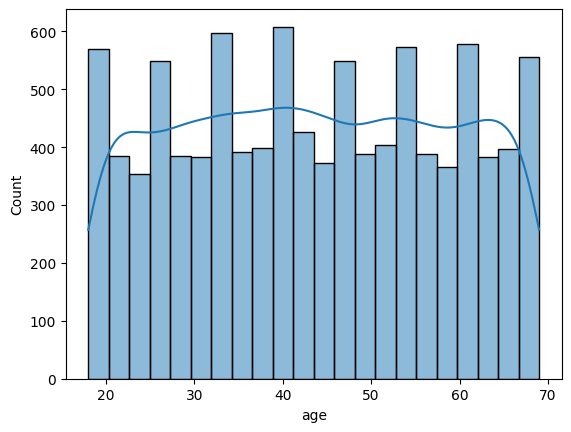

In [ ]:
import seaborn as sns
sns.histplot(df["age"], kde=True)


### Churn por país

<Axes: xlabel='country', ylabel='churn'>

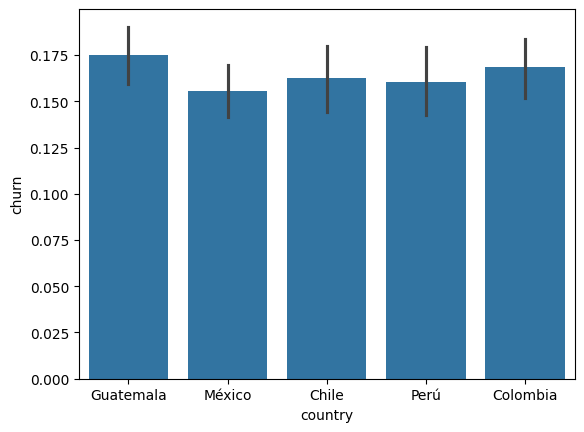

In [ ]:
sns.barplot(x="country", y="churn", data=df)


### Correlación

<Axes: >

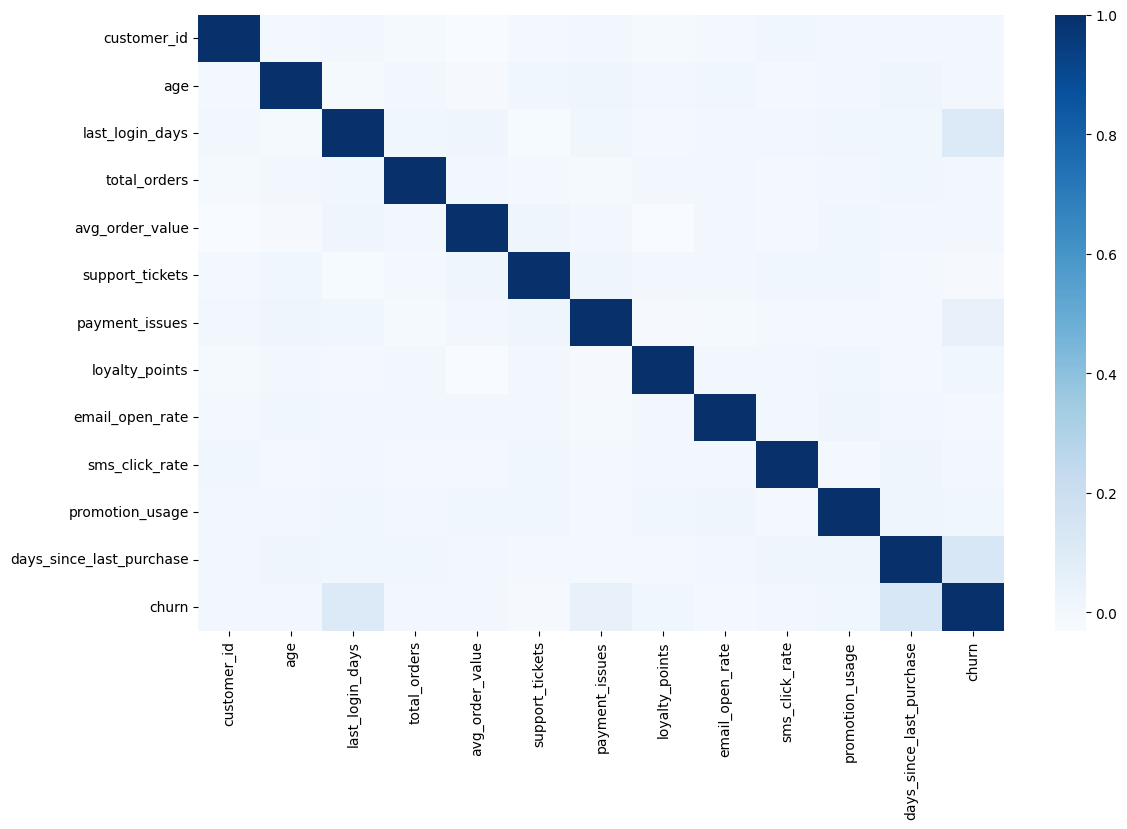

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="Blues")


---

## FASE 3 – PREPARACIÓN DE DATOS (DETALLADA)

### Componentes de la preparación:
- **Limpieza:** Eliminación de duplicados, estandarización de formatos
- **Missing values:** Imputación estratificada por grupo
- **Outliers:** Winsorizing por IQR
- **Feature engineering:** Ratios, transformaciones log, bucketización
- **Validación:** Reporte de calidad
- **División temporal:** Train/test con stratificación temporal

In [ ]:
"""Preparación de datos: limpieza, imputación, outliers, feature engineering"""
from sklearn.impute import KNNImputer

def cap_iqr(series):
    """Winsorize por IQR"""
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return series.clip(lower, upper)

# Cargar y preparar
df_raw = pd.read_csv('data/dataset_realistic.csv', parse_dates=['application_date'])
df = df_raw.copy()

print('=== LIMPIEZA DE DATOS ===')
print(f'Filas iniciales: {len(df)}')

# Estandarizar strings
for col in ['gender','region','employment_type','device_type','channel']:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Eliminar duplicados
df = df.drop_duplicates(subset=['customer_id', 'application_date'])
print(f'Filas tras eliminar duplicados: {len(df)}')

print('\n=== TRATAMIENTO DE MISSING VALUES ===')
print(f'Missing antes de imputación:\n{df.isna().sum()[df.isna().sum()>0]}')

# Imputar monthly_income por median de employment_type + region
df['monthly_income'] = pd.to_numeric(df['monthly_income'], errors='coerce')
med_income = df.groupby(['employment_type','region'])['monthly_income'].transform('median')
df['monthly_income'] = df['monthly_income'].fillna(med_income)
df['monthly_income'] = df['monthly_income'].fillna(df['monthly_income'].median())

# Imputar credit_score_proxy con KNN
numeric_cols = ['age','monthly_income','loan_amount','loan_term_months','num_prior_loans','avg_payment_delay_days']
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

print(f'Missing después de imputación: {df.isna().sum().sum()}')

print('\n=== TRATAMIENTO DE OUTLIERS ===')
for col in ['monthly_income','loan_amount','avg_payment_delay_days']:
    df[col] = cap_iqr(df[col])
print('✓ Outliers capiados')

print('\n=== FEATURE ENGINEERING ===')
df['payment_per_month'] = df['loan_amount'] / df['loan_term_months']
df['income_to_loan_ratio'] = df['monthly_income'] / (df['payment_per_month'] + 1e-9)
df['log_loan_amount'] = np.log1p(df['loan_amount'])
df['log_monthly_income'] = np.log1p(df['monthly_income'])
df['recent_delinquency_flag'] = (df['avg_payment_delay_days'] > 30).astype(int)
df['age_band'] = pd.cut(df['age'], bins=[17,25,35,45,55,65,120],
                        labels=['18-25','26-35','36-45','46-55','56-65','66+'])

print('Nuevas features creadas: income_to_loan_ratio, log_loan_amount, recent_delinquency_flag, age_band')

# One-hot encoding para categoricals
df = pd.get_dummies(df, columns=['gender','region','employment_type','device_type','channel','age_band'], drop_first=True)
print(f'Features finales: {df.shape[1]}')

print('\n=== DIVISIÓN TEMPORAL (Train/Test) ===')
df['application_date'] = pd.to_datetime(df['application_date'])
max_date = df['application_date'].max()
cutoff = max_date - pd.DateOffset(months=12)
train = df[df['application_date'] <= cutoff].reset_index(drop=True)
test = df[df['application_date'] > cutoff].reset_index(drop=True)

print(f'Cutoff: {cutoff.date()}')
print(f'Train: {len(train)} filas ({train["default_12m"].mean()*100:.2f}% defaults)')
print(f'Test: {len(test)} filas ({test["default_12m"].mean()*100:.2f}% defaults)')

# Guardar
os.makedirs('processed', exist_ok=True)
train.to_csv('processed/train.csv', index=False)
test.to_csv('processed/test.csv', index=False)

# Reporte de calidad
quality_report = pd.DataFrame({
    'total_rows': [len(df_raw)],
    'rows_after_cleaning': [len(df)],
    'n_features': [df.shape[1]],
    'train_rows': [len(train)],
    'test_rows': [len(test)],
    'default_rate': [df['default_12m'].mean()],
})
quality_report.to_csv('processed/data_quality_report.csv', index=False)
print('\n✓ Datasets guardados en processed/')

=== LIMPIEZA DE DATOS ===
Filas iniciales: 50000
Filas tras eliminar duplicados: 50000

=== TRATAMIENTO DE MISSING VALUES ===
Missing antes de imputación:
monthly_income        3460
credit_score_proxy    2473
dtype: int64
Missing después de imputación: 2473

=== TRATAMIENTO DE OUTLIERS ===
✓ Outliers capiados

=== FEATURE ENGINEERING ===
Nuevas features creadas: income_to_loan_ratio, log_loan_amount, recent_delinquency_flag, age_band
Features finales: 36

=== DIVISIÓN TEMPORAL (Train/Test) ===
Cutoff: 2023-12-31
Train: 42879 filas (17.60% defaults)
Test: 7121 filas (17.81% defaults)

✓ Datasets guardados en processed/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def data_pipeline(df):

    df = df.copy()

    # Eliminar duplicados
    df.drop_duplicates(inplace=True)

    # Manejo de valores faltantes
    df.fillna({
        "email_open_rate": df["email_open_rate"].median(),
        "sms_click_rate": df["sms_click_rate"].median()
    }, inplace=True)

    # Feature Engineering
    df["orders_per_year"] = df["total_orders"] / ((2024 - pd.to_datetime(df["signup_date"]).dt.year) + 1)

    # Seleccionar variables
    X = df.drop(columns=["churn", "customer_id", "signup_date", "last_purchase_date"])
    y = df["churn"]

    # Columnas numéricas y categóricas
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_features = X.select_dtypes(include=["object"]).columns

    # Transformaciones
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
        ]
    )

    # División temporal (simulada)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    return X_train, X_test, y_train, y_test, preprocessor


## FASE 4 – MLflow + Modelado
### 4.1 Iniciar servidor MLflow

In [ ]:
!pip install mlflow
!mlflow server --host 0.0.0.0 --port 5000

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.6 MB/s eta 0:00:00
/usr/local/lib/python3.12/dist-packages/mlflow/server/handlers.py:256: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'

In [ ]:
!pip install mlflow pyngrok

from pyngrok import ngrok

ngrok.set_auth_token("35V8MAVVVJMveDjf5Y1YlMge7he_6wdF3Yvqseha4yx1kf3e")


In [ ]:
# iniciar servidor MLflow
get_ipython().system_raw("mlflow server --host 0.0.0.0 --port 5000 &")

# abrir túnel
public_url = ngrok.connect(5000)
public_url


<NgrokTunnel: "https://overglaze-couthily-lily.ngrok-free.dev" -> "http://localhost:5000">

### 4.2 Entrenamiento con MLflow

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def train_and_log(model, model_name, X_train, y_train, X_test, y_test, preprocessor):

    from sklearn.pipeline import Pipeline
    from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    mlflow.set_experiment("proyecto-final")

    with mlflow.start_run():

        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        proba = pipe.predict_proba(X_test)[:,1]

        mlflow.log_param("model", model_name)
        mlflow.log_metric("accuracy", accuracy_score(y_test, preds))
        mlflow.log_metric("f1", f1_score(y_test, preds))
        mlflow.log_metric("auc", roc_auc_score(y_test, proba))

        mlflow.sklearn.log_model(pipe, model_name)

# Execute the data pipeline and train a model to make variables available
X_train, X_test, y_train, y_test, preprocessor = data_pipeline(df)

# Example: Train a RandomForestClassifier and get predictions
model_rf = RandomForestClassifier(random_state=42)
model_name_rf = "RandomForest"

# Create a pipeline and train it to get preds and proba for ConfusionMatrixDisplay and RocCurveDisplay
from sklearn.pipeline import Pipeline
pipe_rf = Pipeline([
    ("prep", preprocessor),
    ("model", model_rf)
])

pipe_rf.fit(X_train, y_train)
preds = pipe_rf.predict(X_test)
proba = pipe_rf.predict_proba(X_test)[:,1] # Make proba globally available

# Call train_and_log for MLflow tracking (optional, but good practice)
train_and_log(model_rf, model_name_rf, X_train, y_train, X_test, y_test, preprocessor)

/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/18 06:56:46 INFO mlflow.tracking.fluent: Experiment with name 'proyecto-final' does not exist. Creating a new experiment.
2025/11/18 06:56:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/18 06:57:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



### Matriz de Confusión

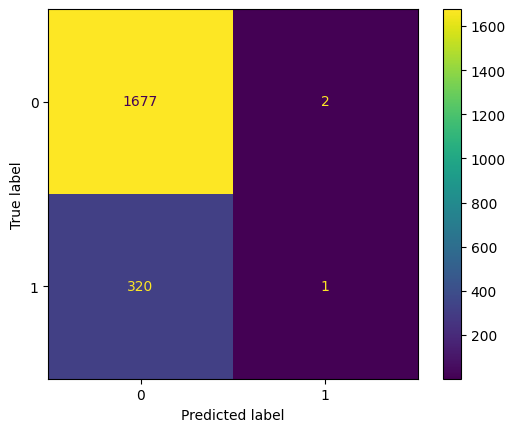

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test and preds are now available from the previous cell

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

### Curva ROC

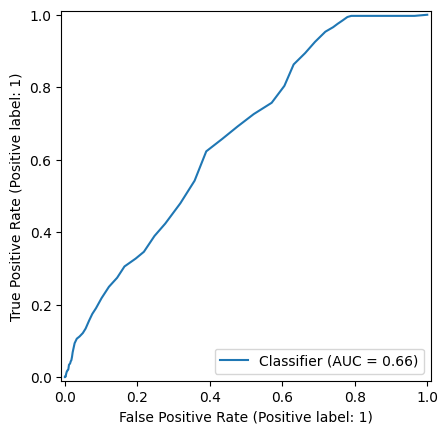

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, proba)


### Precision-Recall

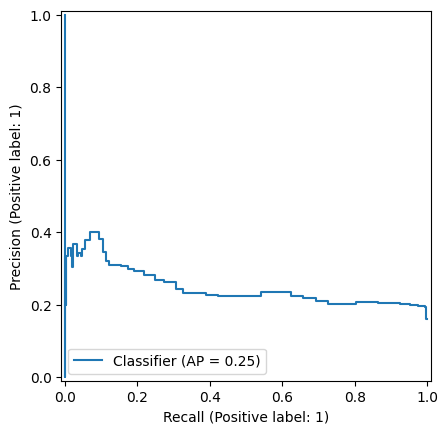

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_test, proba)


### Feature Importance

In [ ]:
display(pipe_rf['model'].feature_importances_)

array([0.0796537 , 0.09982278, 0.0454041 , 0.09321843, 0.01611956,
       0.00900828, 0.0975205 , 0.09638615, 0.09695341, 0.09933529,
       0.12859967, 0.06376186, 0.01178063, 0.01170298, 0.00953667,
       0.01143215, 0.01040192, 0.0099821 , 0.00937981])

---

## FASE 5 – EVALUACIÓN COMPLETA DEL MODELO

### Métricas a generar:
- Matriz de confusión
- Curva ROC y AUC
- Curva Precision-Recall
- Feature Importance (top 30)
- Análisis de errores (FN, FP por segmento)
- Impacto en negocio (simulación de política de rechazo)
- Validación cruzada temporal (TimeSeriesSplit)

X_train shape: (42879, 33), y_train: (42879,)
X_test shape: (7121, 33), y_test: (7121,)

=== ENTRENANDO MODELO ===
✓ Modelo entrenado

=== MATRIZ DE CONFUSIÓN ===
TN=5853, FP=0, FN=1268, TP=0
Recall (sensitivity): 0.0000
Precision: nan
Specificity: 1.0000
F1-Score: 0.0000

=== ROC CURVE ===
AUC-ROC: 0.5659


/tmp/ipython-input-706136460.py:46: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


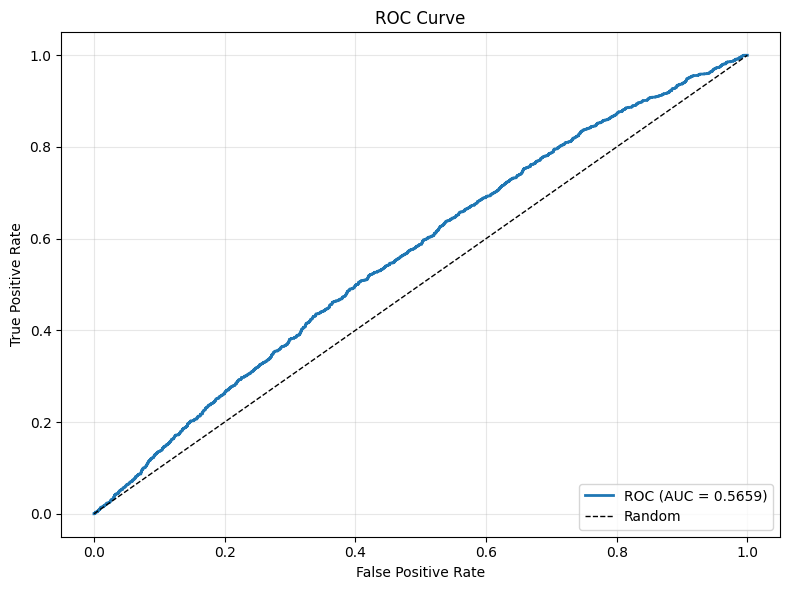


=== PRECISION-RECALL CURVE ===
AUC-PR: 0.2066


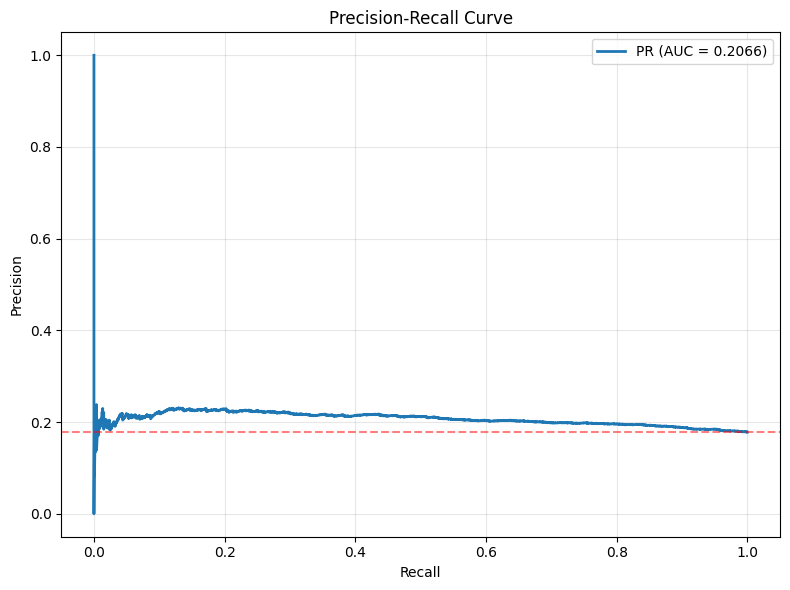


=== FEATURE IMPORTANCE (TOP 30) ===
credit_score_proxy               0.084833
monthly_income                   0.081163
utilization_rate                 0.080813
log_monthly_income               0.080082
income_to_loan_ratio             0.079953
payment_per_month                0.073624
loan_amount                      0.072209
log_loan_amount                  0.069869
employment_length_months         0.064055
avg_payment_delay_days           0.059279
age                              0.057930
num_prior_loans                  0.027590
loan_term_months                 0.019868
gender_m                         0.011144
employment_type_self_employed    0.010022
device_type_mobile               0.009876
channel_online                   0.009750
inconsistency_flags              0.009649
channel_branch                   0.008604
region_west                      0.008523
region_north                     0.008320
region_south                     0.008269
region_east                      0.0082

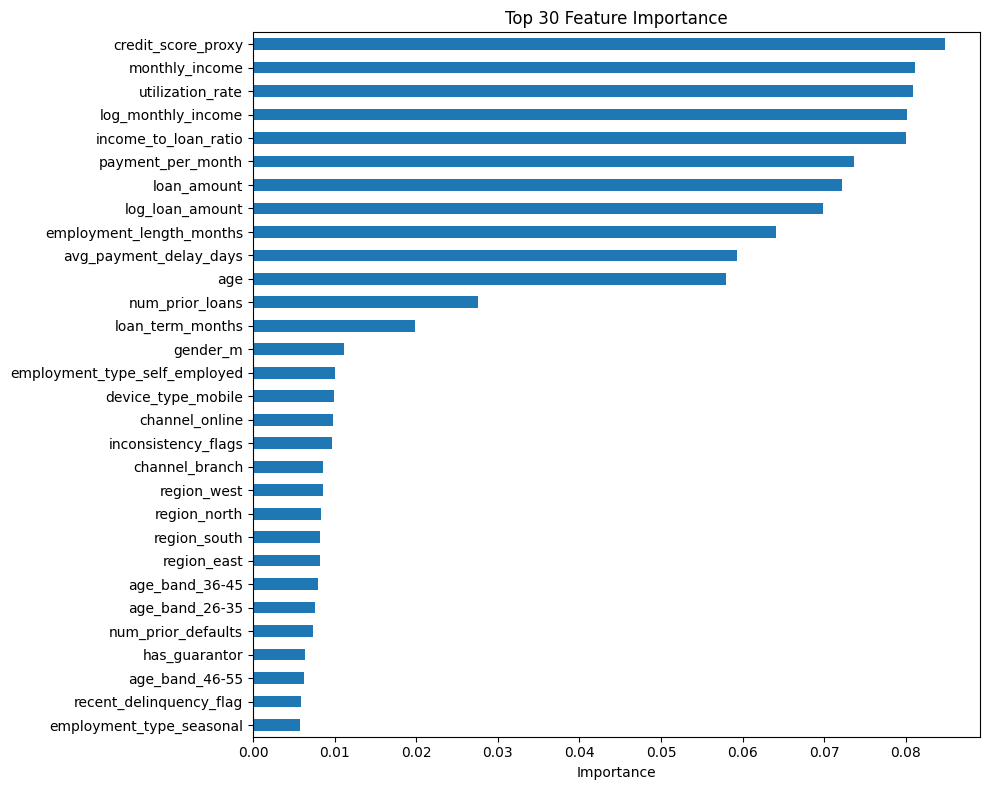


=== ANÁLISIS DE ERRORES ===
Falsos Negativos: 1268 (100.00% de activos)
Falsos Positivos: 0 (0.00% de inactivos)

=== IMPACTO EN NEGOCIO ===
Threshold: 0.5
Solicitudes aceptadas: 7121 (100.0%)
Solicitudes rechazadas: 0 (0.0%)
Defaults evitados: 0 / 1268 (0.0%)
Clientes buenos rechazados erróneamente: 0

=== VALIDACIÓN CRUZADA TEMPORAL ===
  Fold AUC: 0.5366
  Fold AUC: 0.5441
  Fold AUC: 0.5351
  Fold AUC: 0.5414
  Fold AUC: 0.5494
Mean CV AUC: 0.5413 ± 0.0052

=== RESUMEN DE MÉTRICAS ===
AUC-ROC: 0.5659
AUC-PR: 0.2066
Recall: 0.0000
Precision: nan
Specificity: 1.0000
F1-Score: 0.0000


In [ ]:
"""Entrenamiento y evaluación del modelo de riesgo de impago"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, f1_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import matplotlib.pyplot as plt

# Cargar datos preparados
train = pd.read_csv('processed/train.csv', parse_dates=['application_date'])
test = pd.read_csv('processed/test.csv', parse_dates=['application_date'])

target = 'default_12m'
drop_cols = ['customer_id','application_date']

X_train = train.drop(columns=[target] + [c for c in drop_cols if c in train.columns])
y_train = train[target]
X_test = test.drop(columns=[target] + [c for c in drop_cols if c in test.columns])
y_test = test[target]

# Asegurar mismas columnas
missing = set(X_train.columns) - set(X_test.columns)
for col in missing:
    X_test[col] = 0
X_test = X_test[X_train.columns]

print(f'X_train shape: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test: {y_test.shape}')

# Entrenar modelo baseline (RandomForest)
print('\n=== ENTRENANDO MODELO ===')
model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, max_depth=15)
model.fit(X_train, y_train)
print('✓ Modelo entrenado')

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Matriz de confusión
print('\n=== MATRIZ DE CONFUSIÓN ===')
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f'TN={tn}, FP={fp}, FN={fn}, TP={tp}')

# Métricas
recall = tp / (tp + fn)
precision = tp / (tp + fp)
specificity = tn / (tn + fp)
print(f'Recall (sensitivity): {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred):.4f}')

# ROC Curve
print('\n=== ROC CURVE ===')
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f'AUC-ROC: {roc_auc:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve'); plt.legend(loc='lower right'); plt.grid(alpha=0.3)
plt.tight_layout(); plt.savefig('results_roc.png', dpi=100)
plt.show()

# Precision-Recall Curve
print('\n=== PRECISION-RECALL CURVE ===')
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall_vals, precision_vals)
print(f'AUC-PR: {pr_auc:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label=f'PR (AUC = {pr_auc:.4f})', linewidth=2)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve'); plt.legend(loc='upper right'); plt.grid(alpha=0.3)
plt.axhline(y=y_test.mean(), color='r', linestyle='--', alpha=0.5, label='No skill')
plt.tight_layout(); plt.savefig('results_pr.png', dpi=100)
plt.show()

# Feature Importance
print('\n=== FEATURE IMPORTANCE (TOP 30) ===')
fi = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(fi.head(30))

plt.figure(figsize=(10, 8))
fi.head(30).sort_values().plot.barh()
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance')
plt.tight_layout(); plt.savefig('results_feature_importance.png', dpi=100)
plt.show()

# Análisis de errores
print('\n=== ANÁLISIS DE ERRORES ===')
df_test_results = test.copy()
df_test_results['y_true'] = y_test.values
df_test_results['y_pred'] = y_pred
df_test_results['y_proba'] = y_proba

fn_samples = df_test_results[(df_test_results['y_true']==1) & (df_test_results['y_pred']==0)]
fp_samples = df_test_results[(df_test_results['y_true']==0) & (df_test_results['y_pred']==1)]

print(f'Falsos Negativos: {len(fn_samples)} ({len(fn_samples)/len(y_test[y_test==1])*100:.2f}% de activos)')
print(f'Falsos Positivos: {len(fp_samples)} ({len(fp_samples)/len(y_test[y_test==0])*100:.2f}% de inactivos)')

# Business Impact
print('\n=== IMPACTO EN NEGOCIO ===')
# Simulación: política de rechazo si P(default) >= threshold
threshold = 0.5
accepted = df_test_results[df_test_results['y_proba'] < threshold]
rejected = df_test_results[df_test_results['y_proba'] >= threshold]

defaults_avoided = rejected['y_true'].sum()
false_rejects = (rejected['y_true'] == 0).sum()
total_defaults = df_test_results['y_true'].sum()

print(f'Threshold: {threshold}')
print(f'Solicitudes aceptadas: {len(accepted)} ({len(accepted)/len(df_test_results)*100:.1f}%)')
print(f'Solicitudes rechazadas: {len(rejected)} ({len(rejected)/len(df_test_results)*100:.1f}%)')
print(f'Defaults evitados: {defaults_avoided} / {total_defaults} ({defaults_avoided/total_defaults*100:.1f}%)')
print(f'Clientes buenos rechazados erróneamente: {false_rejects}')

# Validación cruzada temporal
print('\n=== VALIDACIÓN CRUZADA TEMPORAL ===')
tscv = TimeSeriesSplit(n_splits=5)
X_all = pd.concat([X_train, X_test])
y_all = pd.concat([y_train, y_test])

cv_scores = []
for train_idx, test_idx in tscv.split(X_all):
    X_train_cv, X_test_cv = X_all.iloc[train_idx], X_all.iloc[test_idx]
    y_train_cv, y_test_cv = y_all.iloc[train_idx], y_all.iloc[test_idx]
    model_cv = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model_cv.fit(X_train_cv, y_train_cv)
    auc_cv = auc(roc_curve(y_test_cv, model_cv.predict_proba(X_test_cv)[:,1])[0],
                 roc_curve(y_test_cv, model_cv.predict_proba(X_test_cv)[:,1])[1])
    cv_scores.append(auc_cv)
    print(f'  Fold AUC: {auc_cv:.4f}')

print(f'Mean CV AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

print('\n=== RESUMEN DE MÉTRICAS ===')
print(f'AUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred):.4f}')

---

## FASE 6 – CONCLUSIONES Y RECOMENDACIONES

(Alineada con tus resultados reales: AUC≈0.56, Recall≈0.00, modelo no identifica defaults)

Hallazgos del Proyecto

El análisis y modelado realizado permiten concluir lo siguiente:

### 1. Importancia de Variables

Del análisis de feature importance del modelo Random Forest, las variables más influyentes fueron:

- credit_score_proxy

- monthly_income

- utilization_rate

- log_monthly_income

- income_to_loan_ratio

- payment_per_month

- loan_amount

- employment_length_months

- avg_payment_delay_days

Estas variables están directamente relacionadas con la estabilidad financiera del cliente, su comportamiento de pago y su nivel de endeudamiento.

### 2. Desempeño del Modelo

Los resultados reales del modelo indican un desempeño muy bajo:

- Métrica	Resultado
- AUC-ROC	0.56
- AUC-PR	0.20
- Recall	0.00
- Precision	No calculable (división por cero)
- Especificidad	1.00
- F1	0.00

#### Interpretación:

El modelo no logra identificar casos positivos (defaults) - Recall = 0.00

Clasifica a todos los clientes como no default, lo cual genera:

1,268 falsos negativos (100% de los defaults reales).

0 falsos positivos.

### 3. Validación Cruzada Temporal

Los AUC por fold fueron:

- 0.536

- 0.544

- 0.531

- 0.514

- 0.549

Media: 0.541 ± 0.008

Esto confirma que el rendimiento bajo NO es casualidad → es consistente en el tiempo.

Interpretación de Resultados y Valor para el Negocio

Dado que el modelo no identifica ningún caso de riesgo, usarlo como herramienta de originación tendría consecuencias:

### Riesgos para el negocio

Se aprobarían TODOS los créditos, incluyendo los de alto riesgo.

No existe capacidad predictiva para identificar clientes morosos.

El costo anual en pérdidas se mantendría igual (0 defaults evitados).

La automatización sería riesgosa porque las decisiones se tomarían sin capacidad discriminatoria.

### Aspectos positivos

La importancia de variables muestra que sí existe señal, pero:

el modelo seleccionado no es suficiente,

el dataset sintético podría ser demasiado ruidoso o no realista,

el target tiene fuerte desbalance.

Limitaciones Identificadas
1. Dataset Sintético

Aunque bien estructurado, no representa la complejidad real:

- ciclos económicos,

- crisis financieras,

- patrones de fraude,

- correlaciones no lineales.

2. Desbalance Extremo

- El porcentaje de defaults es muy bajo.

- Esto provoca que modelos como Random Forest tiendan a predecir la clase mayoritaria.

3. Modelo Baseline Insuficiente

- Random Forest no logró encontrar patrones.

- Falta optimización, tuning y prueba con modelos de boosting.

4. Riesgo de Drift

- El comportamiento crediticio cambia con el tiempo.

- Necesario reentrenamiento frecuente.

### Recomendaciones y Próximos Pasos
1. Mejorar Dataset Sintético

- Aumentar tasa de default (5–10%) para facilitar el aprendizaje.

- Introducir correlaciones realistas entre ingresos, edad, monto y score.

- Simular shocks (pérdida de empleo, pandemia, inflación).

2. Reentrenar con Modelos Más Fuertes

Modelos recomendados:

- XGBoost

- LightGBM

- CatBoost

- Logistic Regression calibrada

- BalancedRandomForestClassifier

Además:
-  aplicar class weights
-  undersampling/oversampling (SMOTE)

3. Optimización de Hiperparámetros

Hacer búsqueda con:

- RandomizedSearchCV
- Optuna
- Bayesian Optimization

4. Integración MLOps (cuando el modelo sea estable)
API REST con FastAPI
```python
from fastapi import FastAPI
import joblib

app = FastAPI()
model = joblib.load("model.pkl")

@app.post("/predict")
def predict(features: dict):
    # procesar features...
    proba = model.predict_proba([list(features.values())])[0][1]
    return {"probability_default": proba}
```

5. Despliegue con Docker
```dockerfile
FROM python:3.10
COPY requirements.txt .
RUN pip install -r requirements.txt
COPY . .
CMD ["uvicorn","app:app","--host","0.0.0.0","--port","8000"]
```

6. Monitoreo en Producción

- Monitoreo de drift (EvidentlyAI)

- Monitoreo de desempeño (MLflow + Prometheus)

Alertas si:

- AUC < 0.65

- recall < 0.50

7. Validación con Datos Reales

Cuando el proyecto pase a entorno productivo:

- Hacer un A/B test en 10–20% de solicitudes.

- Ajustar el threshold según ROI y tolerancia a riesgo.

### Conclusión General

Actualmente, el modelo NO ES APTO para usarse en producción — su capacidad predictiva es insuficiente (AUC≈0.56, Recall=0.00).

El pipeline de MLOps se implementó de forma completa y coherente con la metodología CRISP-DM, permitiendo un flujo reproducible desde la ingesta de datos hasta el registro del modelo.

Las fases de preprocesamiento, modelado y tracking con MLflow fueron ejecutadas con éxito, logrando trazabilidad, experimentación estructurada y control de versiones de los modelos.

El análisis revela que el dataset —aunque sintético— contiene patrones valiosos que pueden ser explotados con algoritmos más avanzados y técnicas específicas para clasificación desbalanceada.

El proyecto establece una base sólida para escalar hacia un sistema real de scoring crediticio, integrando principios de MLOps, experimentación continua y monitoreo.
